### About the project

* Client is a large multi national company providing different services
* A way to ease the promotion process is needed, helping identify the right people for promotion


In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.pyplot import show
pd.set_option('display.max_colwidth', 0) #So the text is not truncated
data = pd.read_csv("train_hr.csv")
expectations = pd.read_csv('columns.csv')

In [32]:
expectations

,Variable,Type,Expectation,Comments
0,Department,Object,Medium.,"The bigger the department, more people will be promoted from that department, but there is a minimum expected of promotions from each department."
1,Region,Object,Medium,Size of region related to the amount of departments.
2,Education,Object,High,Level of education expected to be important when promoting.
3,Gender,Object,Low,"If the company operates at an expected level of equity, gender shouldn't be important in the promotion process. Have to be careful on not establishing a gender bias in the model."
4,Recruitment Channel,Object,Low,"The way the employee was recruited shouldn't e important, but it is probable we might fin an insight when analyzing the data"
5,Number of Trainings,Numeric,High,Number of trainings is expected to be highly regarded
6,Age,Numeric,Low,"While not excluding, age might determine laboral experience"
7,Previous year rating,Numeric,High,"If employee rating is high, it is expected to have more options of being promoted"
8,Length of service,Numeric,High,"This variable might be correlated with age, I consider this column to be important due to the knowledge of how the company works"
9,KPIs_met >80%,Binary,High,Employees considered to be promoted are the ones with KPI's better than 60%.


# Output (Y) variable analysis

<AxesSubplot:xlabel='is_promoted', ylabel='count'>

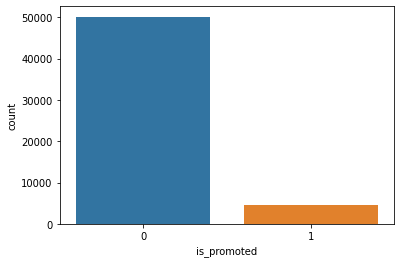

In [3]:
train=pd.read_csv("train_hr.csv",index_col = "employee_id")
datos = train.copy()

datos.head()

datos.is_promoted.value_counts()/datos.is_promoted.size
sns.countplot(x= "is_promoted",data = datos)
#Approximately 9% of the workforce is promoted

# Bi-variable analysis

##### Y with DEPARTMENT

In [4]:
# Percentage of personnel in each department
100 * datos['department'].value_counts() / len(datos['department'])


department
Sales & Marketing    30.725442
Operations           20.705007
Technology           13.023646
Procurement          13.023646
Analytics             9.764998
Finance               4.627062
HR                    4.411765
Legal                 1.895709
R&D                   1.822727
Name: count, dtype: float64

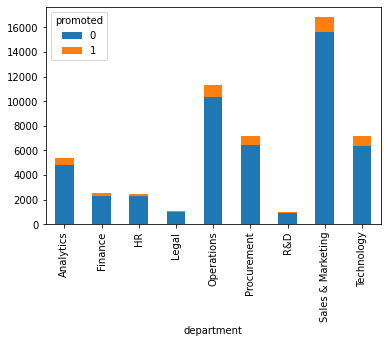

In [7]:
cross_tab=pd.crosstab(index=datos['department'], columns=datos['is_promoted'], margins=False)

pd.crosstab(datos['department'], datos['is_promoted']).apply(lambda r: r/r.sum(), axis=1) 

cross_tab.plot.bar(stacked=True)

plt.legend(title='promoted')


## Takeaways

Approx 9% of the workforce is promoted

Promotion percentage related to deparment between 5% and 10%

The smaller the deparment, less promotion possibilities


#### Y with region

region
region_2     22.520435
region_22    11.728215
region_7     8.836301 
region_15    5.123340 
region_13    4.831411 
region_26    4.123486 
region_31    3.530506 
region_4     3.107211 
region_27    3.026930 
region_16    2.672967 
region_28    2.404758 
region_11    2.399285 
region_23    2.143848 
region_29    1.813604 
region_32    1.724201 
region_19    1.594658 
region_20    1.550868 
region_14    1.508904 
region_25    1.494307 
region_17    1.452343 
region_5     1.397606 
region_6     1.258940 
region_30    1.198730 
region_8     1.195081 
region_10    1.182309 
region_1     1.112976 
region_24    0.926872 
region_12    0.912276 
region_9     0.766311 
region_21    0.749891 
region_3     0.631295 
region_34    0.532769 
region_33    0.490804 
region_18    0.056561 
Name: count, dtype: float64


<AxesSubplot:xlabel='region'>

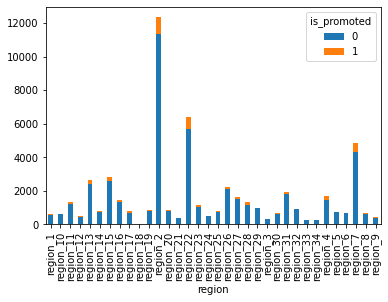

In [40]:
print(100 * datos['region'].value_counts() / len(datos['region']))
cross_tab_region=pd.crosstab(index=datos['region'], columns=datos['is_promoted'], margins=False)

cross_tab_region.plot.bar(stacked=True)


Takeaway of region category: 3 main regions

#### Y with Education
Education column has missings, so first we will treat the missings

In [9]:
datos.isnull().sum()/datos.isnull().count() #Education has missings

department              0.000000
region                  0.000000
education               0.043953
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    0.075244
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [14]:
datos.education.value_counts()
#Bachelor's is the most common option, so i input missing values to Bachelor's


education
Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64

In [15]:
datos.education.fillna("Bachelor's",inplace = True)

 Porcentajes de ascenso:
 is_promoted              0         1
education                           
Bachelor's        0.917969  0.082031
Below Secondary   0.916770  0.083230
Master's & above  0.901441  0.098559


<AxesSubplot:xlabel='education'>

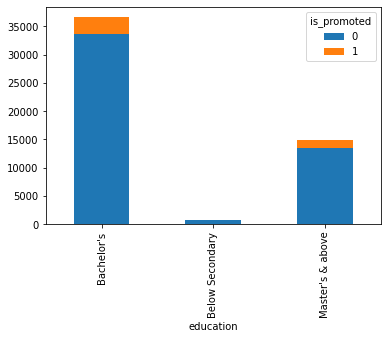

In [41]:
cross_tab_education=pd.crosstab(index=datos['education'], columns=datos['is_promoted'], margins=False)

print(" Porcentajes de ascenso:\n",pd.crosstab(datos['education'], datos['is_promoted']).apply(lambda r: r/r.sum(), axis=1)) 

cross_tab_education.plot.bar(stacked=True)

### Takeaways:
- Promotion percentage fairly balanced in 3 groups
- Below secondary workforce is minuscule compared to other categories

### Y with Gender

In [42]:
100 * datos['gender'].value_counts() / len(datos['gender'])

gender
m    70.237921
f    29.762079
Name: count, dtype: float64

 Porcentajes de ascenso:
 is_promoted         0         1
gender                         
f            0.910066  0.089934
m            0.916849  0.083151


<AxesSubplot:xlabel='gender'>

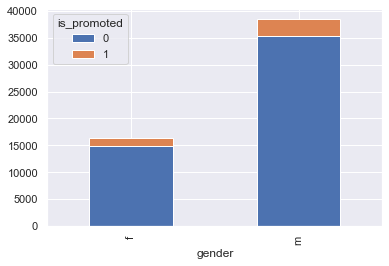

In [43]:


cross_tab_gender = pd.crosstab(index=datos['gender'], columns=datos['is_promoted'], margins=False)

print(" Porcentajes de ascenso:\n",pd.crosstab(datos['gender'], datos['is_promoted']).apply(lambda r: r/r.sum(), axis=1))

cross_tab_gender.plot.bar(stacked=True)

### Takeaways:
- Unbalanced group, less F than M in the workforce

### Y with recruitment_channel

 Porcentajes de ascenso:
 is_promoted                 0         1
recruitment_channel                    
other                0.916048  0.083952
referred             0.879159  0.120841
sourcing             0.914987  0.085013
Referred has higher percentage (12%) but the number of referred is very low


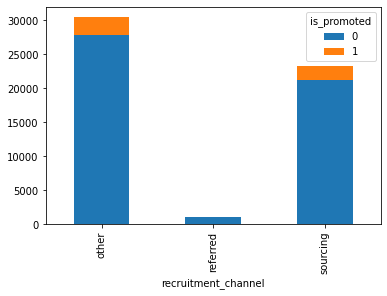

In [44]:
cross_tab_channel = pd.crosstab(index=datos['recruitment_channel'], columns=datos['is_promoted'], margins=False)

print(" Porcentajes de ascenso:\n",pd.crosstab(datos['recruitment_channel'], datos['is_promoted']).apply(lambda r: r/r.sum(), axis=1))
cross_tab_channel.plot.bar(stacked=True)

print('Referred has higher percentage (12%) but the number of referred is very low')

### Takeaway:
- In the 9% group as other variables.
- Referred has a higher percentage of promotion but far less values.

## Y with numerical variables

### Y with no_of_trainings

In [45]:
cross_tab_training= pd.crosstab(index=datos['no_of_trainings'], columns=datos['is_promoted'], margins=False)
cross_tab_trainingb

is_promoted,0,1
no_of_trainings,,
1,40468,3910
2,7382,605
3,1654,122
4,442,26
5,125,3
6,42,2
7,12,0
8,5,0
9,5,0


### Output variable with age

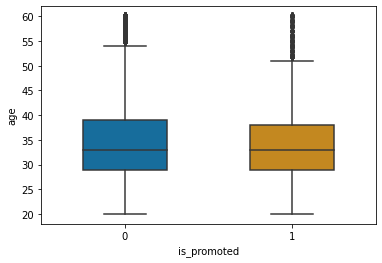

In [47]:
bplot_age = sns.boxplot(y='age', x='is_promoted', 
                 data=datos, 
                 width=0.5,
                 palette="colorblind",)

### Takeaways:
- workforce in similar age, no discerning features

### Output variable with previous_year_rating

In [21]:
# Ordinary value, from 1.0 to 5.0
# Missing values encountered in previous_year_rating
datos.previous_year_rating.value_counts()
print('Most common value is 3.0, so we input the most common value for the missings')
datos.previous_year_rating.fillna(3.0,inplace = True)

Most common value is 3.0, so we input the most common value for the missings


Previous_year_rating is an ordinal, from 1.0 to 5.0

 Promotion percentages:
 is_promoted                  0         1
previous_year_rating                    
1.0                   0.985859  0.014141
2.0                   0.957160  0.042840
3.0                   0.925512  0.074488
4.0                   0.920624  0.079376
5.0                   0.836385  0.163615


<AxesSubplot:xlabel='previous_year_rating'>

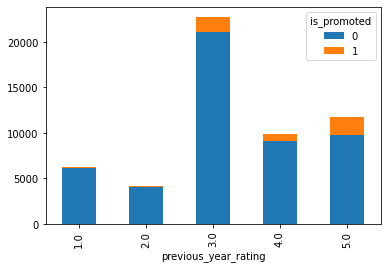

In [22]:

print(" Promotion percentages:\n",pd.crosstab(datos['previous_year_rating'], datos['is_promoted']).apply(lambda r: r/r.sum(), axis=1))

cross_tab_rating = pd.crosstab(index=datos['previous_year_rating'], columns=datos['is_promoted'], margins=False)
cross_tab_rating.plot.bar(stacked=True)

#### Takeaways:
 - Expected, with a 5.0 score, better probabilities to be promoted. The inverse is true with a 1.0 score.
 - No difference between 3.0 and 4.0.

### Y con length_of_service

no visible differences according to the age


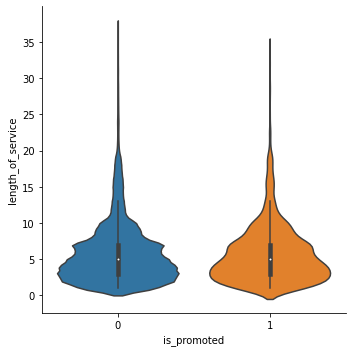

In [23]:
sns.catplot(x="is_promoted", y="length_of_service",
            kind="violin", data=datos);
print('no visible differences according to the age')

### Y con KPI: 

 Porcentajes de ascenso:
 is_promoted           0         1
KPIs_met >80%                    
0              0.960413  0.039587
1              0.830906  0.169094


<AxesSubplot:xlabel='KPIs_met >80%'>

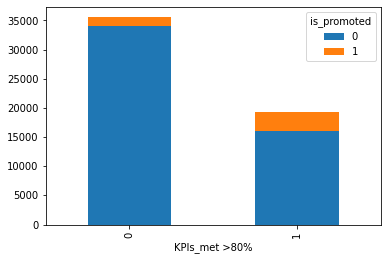

In [24]:
print(" Porcentajes de ascenso:\n",pd.crosstab(datos['KPIs_met >80%'], datos['is_promoted']).apply(lambda r: r/r.sum(), axis=1))
cross_tab_kpi = pd.crosstab(index=datos['KPIs_met >80%'], columns=datos['is_promoted'], margins=False)
cross_tab_kpi.plot.bar(stacked=True)

#### Takeaways:
- 16% of people with KPI > 80% are promoted. Under 80% only 4% of people is promoted

### Y with awards_won: 


 Promotion percentages:
 is_promoted         0         1
awards_won?                    
0            0.923251  0.076749
1            0.559843  0.440157
ascensos:
 is_promoted      0     1
awards_won?             
0            49429  4109
1              711   559


<AxesSubplot:xlabel='awards_won?'>

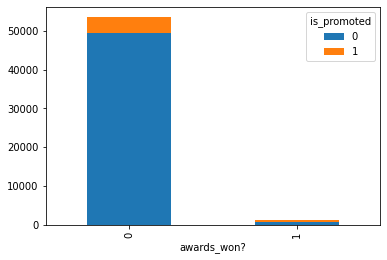

In [26]:

print(" Promotion percentages:\n",pd.crosstab(datos['awards_won?'], datos['is_promoted']).apply(lambda r: r/r.sum(), axis=1))
print("ascensos:\n",pd.crosstab(datos['awards_won?'], datos['is_promoted']))
cross_tab_awards = pd.crosstab(index=datos['awards_won?'], columns=datos['is_promoted'], margins=False)
cross_tab_awards.plot.bar(stacked=True)

#### Takeaways:
- Only 2% of employees had an award
- Of those, 44% were promoted
- Regarding no award employees, only 7% were promoted.


#### Output column with continuous variables

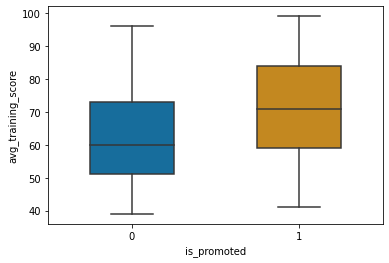

In [27]:
# Y with avg_training_score
bplot = sns.boxplot(y='avg_training_score', x='is_promoted', 
                 data=datos, 
                 width=0.5,
                 palette="colorblind")

# Analysis Takeaways : 
- Output variable very unbalanced, only 10% of results end in promotion
- Many categorical values and only 1 continuous (avg_training_score)
- Should group variables for better analysisi
- Most interesting columns: previous_year_rating, avg_training_score, KPI > 80%